In [1]:
import pandas_datareader as pdr
import pandas as pd
import datetime
start = datetime.datetime(2016, 1, 1)
end = datetime.datetime(2018, 1, 1)
df = pdr.get_data_yahoo("AAPL", start, end)["Adj Close"]
print(df)

Date
2016-01-04    101.014183
2016-01-05     98.482841
2016-01-06     96.555573
2016-01-07     92.480476
2016-01-08     92.969490
2016-01-11     94.474876
2016-01-12     95.846016
2016-01-13     93.381798
2016-01-14     95.424118
2016-01-15     93.132492
2016-01-19     92.681839
2016-01-20     92.806496
2016-01-21     92.336662
2016-01-22     97.245926
2016-01-25     95.347420
2016-01-26     95.874786
2016-01-27     89.575188
2016-01-28     90.217613
2016-01-29     93.333847
2016-02-01     92.461311
2016-02-02     90.591560
2016-02-03     92.384605
2016-02-04     93.126907
2016-02-05     90.639671
2016-02-08     91.594078
2016-02-09     91.574791
2016-02-10     90.880692
2016-02-11     90.331184
2016-02-12     90.610756
2016-02-16     93.165482
                 ...    
2017-11-16    170.405243
2017-11-17    169.459091
2017-11-20    169.289780
2017-11-21    172.436951
2017-11-22    174.249573
2017-11-24    174.259521
2017-11-27    173.383087
2017-11-28    172.367249
2017-11-29    168.79

In [2]:
#Let's find the max
print(df.max())

175.703629


In [3]:
#And the min
print(df.min())

87.622231


In [4]:
#Describe the data
print(df.describe())

count    503.000000
mean     125.176577
std       26.581256
min       87.622231
25%      102.135933
50%      114.728798
75%      150.757835
max      175.703629
Name: Adj Close, dtype: float64


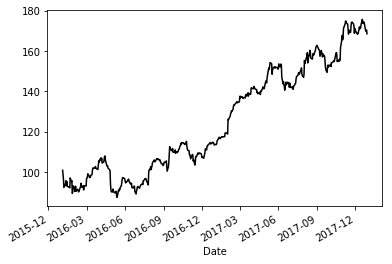

In [5]:
import matplotlib.pyplot as plt
df.plot(kind="line",color="k")
plt.show()

In [6]:
#Let's get a rolling dataframe
rolling = df.rolling(window=21)
print(rolling)

Rolling [window=21,center=False,axis=0]


In [7]:
#We can get the rolling mean by applying the mean function
rollingMean = rolling.mean()
print(rollingMean)

Date
2016-01-04           NaN
2016-01-05           NaN
2016-01-06           NaN
2016-01-07           NaN
2016-01-08           NaN
2016-01-11           NaN
2016-01-12           NaN
2016-01-13           NaN
2016-01-14           NaN
2016-01-15           NaN
2016-01-19           NaN
2016-01-20           NaN
2016-01-21           NaN
2016-01-22           NaN
2016-01-25           NaN
2016-01-26           NaN
2016-01-27           NaN
2016-01-28           NaN
2016-01-29           NaN
2016-02-01           NaN
2016-02-02     94.106405
2016-02-03     93.695473
2016-02-04     93.440429
2016-02-05     93.158719
2016-02-08     93.116509
2016-02-09     93.050095
2016-02-10     92.878944
2016-02-11     92.616333
2016-02-12     92.484378
2016-02-16     92.376824
                 ...    
2017-11-16    165.870826
2017-11-17    166.569346
2017-11-20    167.247044
2017-11-21    168.078388
2017-11-22    168.952099
2017-11-24    169.858890
2017-11-27    170.676691
2017-11-28    171.179595
2017-11-29    171.33

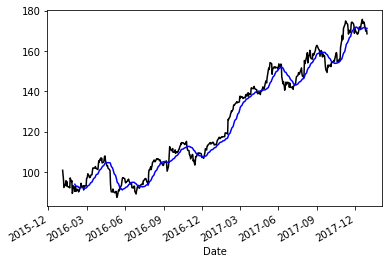

In [8]:
#Plot our rolling mean over our real data
df.plot(kind="line",color="k")
rollingMean.plot(kind="line",color="b")
plt.show()

In [9]:
#We can also get the standard deviation for each rolling window
std = rolling.std()
print(std)

Date
2016-01-04         NaN
2016-01-05         NaN
2016-01-06         NaN
2016-01-07         NaN
2016-01-08         NaN
2016-01-11         NaN
2016-01-12         NaN
2016-01-13         NaN
2016-01-14         NaN
2016-01-15         NaN
2016-01-19         NaN
2016-01-20         NaN
2016-01-21         NaN
2016-01-22         NaN
2016-01-25         NaN
2016-01-26         NaN
2016-01-27         NaN
2016-01-28         NaN
2016-01-29         NaN
2016-02-01         NaN
2016-02-02    2.791632
2016-02-03    2.319107
2016-02-04    2.044548
2016-02-05    2.000964
2016-02-08    2.025189
2016-02-09    2.052930
2016-02-10    2.077879
2016-02-11    2.032128
2016-02-12    2.069561
2016-02-16    1.965204
                ...   
2017-11-16    7.576103
2017-11-17    7.168664
2017-11-20    6.682225
2017-11-21    6.143909
2017-11-22    5.606835
2017-11-24    4.748566
2017-11-27    3.626573
2017-11-28    3.015816
2017-11-29    2.776904
2017-11-30    2.653602
2017-12-01    2.307110
2017-12-04    2.110118
2017-1

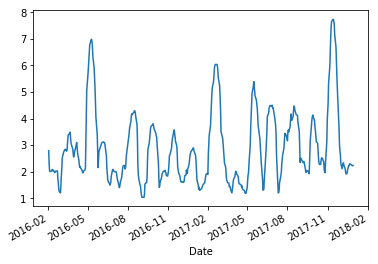

In [10]:
std.plot(kind="line")
plt.show()

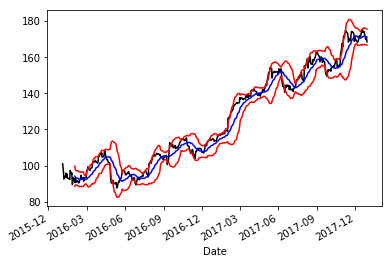

In [11]:
#Let's create bollinger bands by adding two standard deviations above and below
upperBand = rollingMean + std*2
lowerBand = rollingMean - std*2
df.plot(kind="line",color="k")
rollingMean.plot(kind="line",color="b")
upperBand.plot(kind="line",color="r")
lowerBand.plot(kind="line",color="r")
plt.show()

In [12]:
#We can use truth indexing with two different choices if we want to see where the stock breaks from the bands
#But python "or" does not work...look below
print((df>upperBand) or (df<lowerBand))

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [13]:
#Because pandas is built off C, we use C's or: |
print((df>upperBand) | (df<lowerBand))

Date
2016-01-04    False
2016-01-05    False
2016-01-06    False
2016-01-07    False
2016-01-08    False
2016-01-11    False
2016-01-12    False
2016-01-13    False
2016-01-14    False
2016-01-15    False
2016-01-19    False
2016-01-20    False
2016-01-21    False
2016-01-22    False
2016-01-25    False
2016-01-26    False
2016-01-27    False
2016-01-28    False
2016-01-29    False
2016-02-01    False
2016-02-02    False
2016-02-03    False
2016-02-04    False
2016-02-05    False
2016-02-08    False
2016-02-09    False
2016-02-10    False
2016-02-11    False
2016-02-12    False
2016-02-16    False
              ...  
2017-11-16    False
2017-11-17    False
2017-11-20    False
2017-11-21    False
2017-11-22    False
2017-11-24    False
2017-11-27    False
2017-11-28    False
2017-11-29    False
2017-11-30    False
2017-12-01    False
2017-12-04    False
2017-12-05    False
2017-12-06    False
2017-12-07    False
2017-12-08    False
2017-12-11    False
2017-12-12    False
2017-12-13    F

In [14]:
print(df[(df>upperBand) | (df<lowerBand)])

Date
2016-03-01     96.915604
2016-03-02     97.127708
2016-03-03     97.850739
2016-03-04     99.306450
2016-03-30    105.620964
2016-04-27     94.303055
2016-04-28     91.420547
2016-04-29     90.369751
2016-05-02     90.273338
2016-05-25     96.623055
2016-05-26     97.389297
2016-05-27     97.331093
2016-06-24     90.590179
2016-06-27     89.271095
2016-07-18     96.826736
2016-07-27     99.852882
2016-07-28    101.201057
2016-07-29    101.074974
2016-08-01    102.859612
2016-09-08    102.900002
2016-09-09    100.569328
2016-09-14    108.994804
2016-09-15    112.700447
2016-09-16    112.066589
2016-10-12    114.426506
2016-10-14    114.709305
2016-11-01    108.721756
2016-11-03    107.652863
2016-11-04    106.682487
2016-12-13    112.906616
                 ...    
2017-05-08    150.627151
2017-05-09    151.591904
2017-05-12    154.303329
2017-06-09    147.265274
2017-06-12    143.746231
2017-06-13    144.902771
2017-06-14    143.489243
2017-06-15    142.629242
2017-06-16    140.63

In [15]:
#The operator for and in C is &
#Let's get all points in the band
print(df[(df<upperBand) & (df>lowerBand)])

Date
2016-02-02     90.591560
2016-02-03     92.384605
2016-02-04     93.126907
2016-02-05     90.639671
2016-02-08     91.594078
2016-02-09     91.574791
2016-02-10     90.880692
2016-02-11     90.331184
2016-02-12     90.610756
2016-02-16     93.165482
2016-02-17     94.592262
2016-02-18     92.799141
2016-02-19     92.587051
2016-02-22     93.396843
2016-02-23     91.285583
2016-02-24     92.644890
2016-02-25     93.281166
2016-02-26     93.425774
2016-02-29     93.213684
2016-03-07     98.207428
2016-03-08     97.397629
2016-03-09     97.484406
2016-03-10     97.532593
2016-03-11     98.583405
2016-03-14     98.834068
2016-03-15    100.820007
2016-03-16    102.160034
2016-03-17    101.996140
2016-03-18    102.111832
2016-03-21    102.102188
                 ...    
2017-11-15    168.393448
2017-11-16    170.405243
2017-11-17    169.459091
2017-11-20    169.289780
2017-11-21    172.436951
2017-11-22    174.249573
2017-11-24    174.259521
2017-11-27    173.383087
2017-11-28    172.36

In [16]:
#What percent is outside of the bands?
len(df[(df>upperBand) | (df<lowerBand)]) / len(df)

0.14512922465208747

In [17]:
#Let's graph a few different stocks!

In [18]:
#Turn our code into a function
def bollingerBand(df,ticker):
    rolling = df.rolling(window=21)
    mean = rolling.mean()
    std = rolling.std()
    upperBand = mean+std*2
    lowerBand = mean-std*2
    df.plot(kind="line",color="k")
    mean.plot(kind="line",color="b")
    upperBand.plot(kind="line",color="r")
    lowerBand.plot(kind="line",color="r")
    plt.title(ticker+" Bollinger Band Graph")
    plt.show()

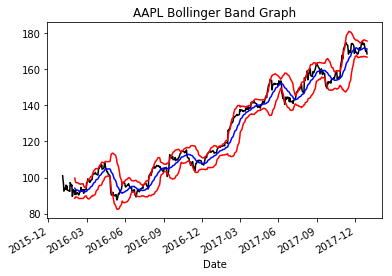

In [19]:
bollingerBand(df,"AAPL")

In [20]:
plt.rcParams["figure.figsize"] = [12,9]

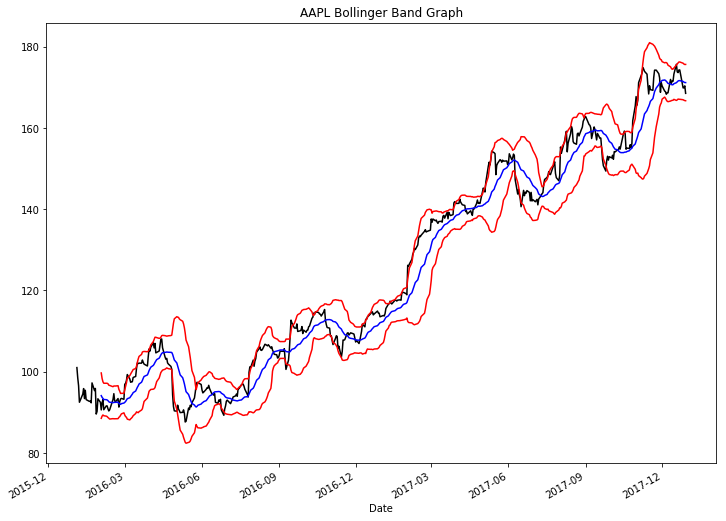

In [21]:
bollingerBand(df,"AAPL")

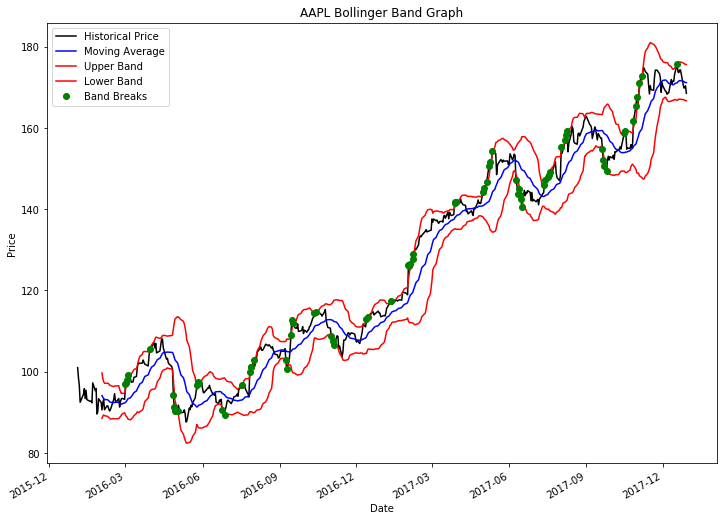

In [22]:
#Turn our code into a function
def bollingerBand(df,ticker):
    rolling = df.rolling(window=21)
    mean = rolling.mean()
    std = rolling.std()
    upperBand = mean+std*2
    lowerBand = mean-std*2
    df.plot(kind="line",color="k",label="Historical Price")
    mean.plot(kind="line",color="b",label="Moving Average")
    upperBand.plot(kind="line",color="r",label="Upper Band")
    lowerBand.plot(kind="line",color="r",label="Lower Band")
    #Let's also add some green dots where the line breaks the bollinger bands
    breaks = df[(df>upperBand) | (df<lowerBand)]
    breaks.plot(style="go",label="Band Breaks")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.title(ticker+" Bollinger Band Graph")
    plt.show()
bollingerBand(df,"AAPL")

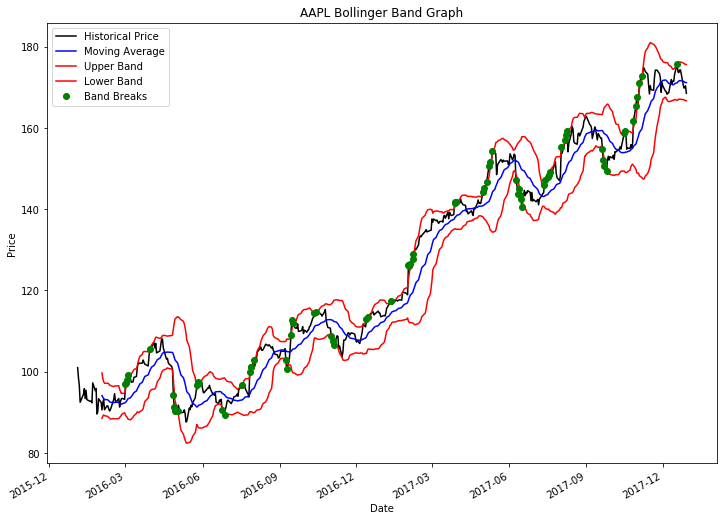

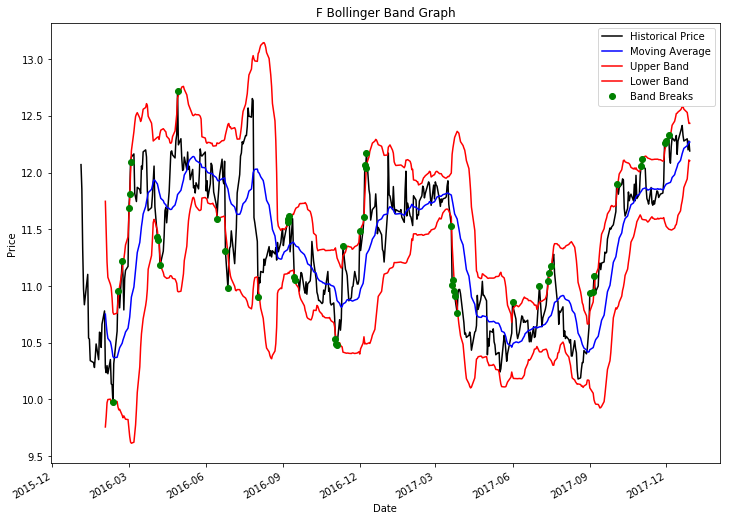

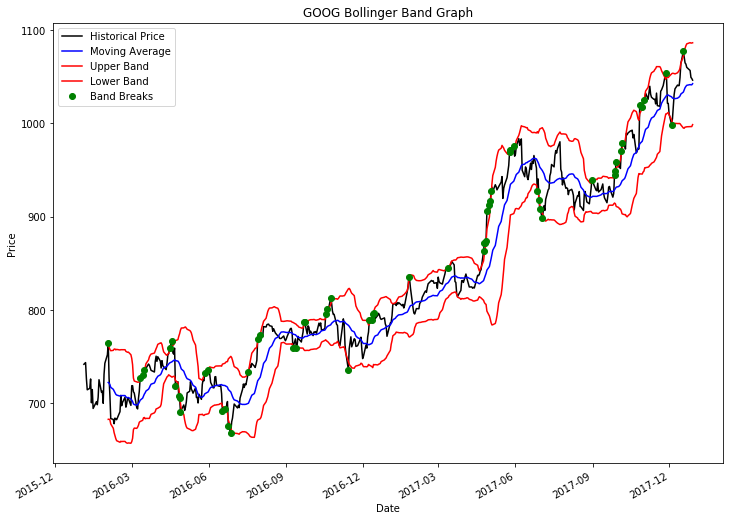

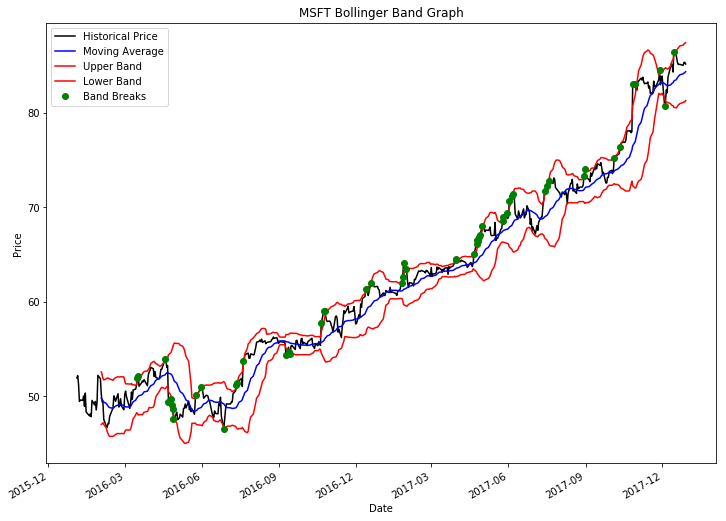

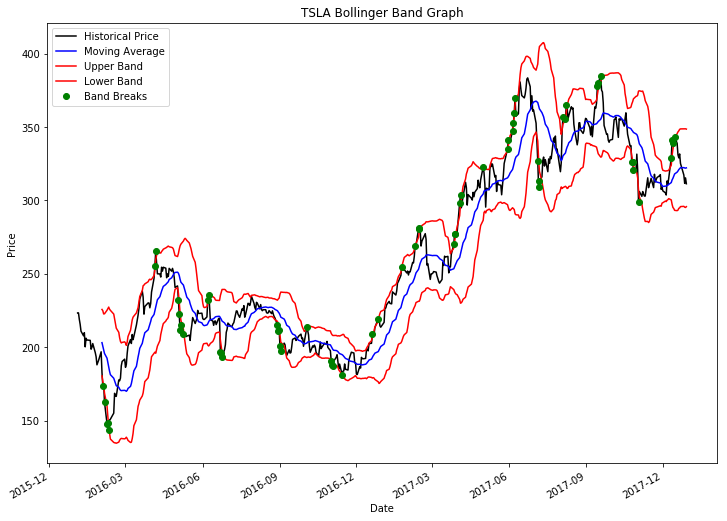

In [23]:
df = pdr.get_data_yahoo(["AAPL","F","TSLA","MSFT","GOOG"], start, end)["Adj Close"]
df.sort_index(inplace=True)
for x in df.columns:
    bollingerBand(df[x],x)

In [24]:
print(df.cov())
#We can get the covariances of stocks using cov()

             AAPL         F          GOOG         MSFT         TSLA
AAPL   706.563159 -1.718664   2760.406631   276.437666  1438.877964
F       -1.718664  0.371682     -3.736774     0.016418    -5.289839
GOOG  2760.406631 -3.736774  11527.150512  1123.657655  5708.535129
MSFT   276.437666  0.016418   1123.657655   114.620065   543.301773
TSLA  1438.877964 -5.289839   5708.535129   543.301773  3802.161404


In [25]:
print(df.corr())
#Or the correlations

          AAPL         F      GOOG      MSFT      TSLA
AAPL  1.000000 -0.106055  0.967245  0.971385  0.877876
F    -0.106055  1.000000 -0.057089  0.002515 -0.140715
GOOG  0.967245 -0.057089  1.000000  0.977558  0.862280
MSFT  0.971385  0.002515  0.977558  1.000000  0.822992
TSLA  0.877876 -0.140715  0.862280  0.822992  1.000000


In [26]:
print(df.pct_change(periods=3))
#We can also get the percentage change over three periods

                AAPL         F      GOOG      MSFT      TSLA
Date                                                        
2016-01-04       NaN       NaN       NaN       NaN       NaN
2016-01-05       NaN       NaN       NaN       NaN       NaN
2016-01-06       NaN       NaN       NaN       NaN       NaN
2016-01-07 -0.084480 -0.090909 -0.020827 -0.047993 -0.034734
2016-01-08 -0.055983 -0.086006 -0.037855 -0.049410 -0.055633
2016-01-11 -0.021549 -0.025934 -0.037102 -0.032377 -0.051087
2016-01-12  0.036392  0.011811 -0.000441  0.011693 -0.026339
2016-01-13  0.004435 -0.027113 -0.019469 -0.013186 -0.050664
2016-01-14  0.010048 -0.045419 -0.001830  0.015488 -0.008035
2016-01-15 -0.028311 -0.068482 -0.043550 -0.033914 -0.023718
2016-01-19 -0.007496 -0.020492  0.001756 -0.020914  0.022016
2016-01-20 -0.027431 -0.023790 -0.022764 -0.043683 -0.036279
2016-01-21 -0.008545  0.003342  0.017481 -0.010002 -0.024489
2016-01-22  0.049245  0.015900  0.033429  0.034217 -0.010600
2016-01-25  0.027379  0.

In [27]:
l = [70,6,4,8,16]
s = pd.Series(l)
print(s.rank())
#The rank function gives us the rankings of numbers in the dataframe

0    5.0
1    2.0
2    1.0
3    3.0
4    4.0
dtype: float64


In [28]:
df = pd.DataFrame(s,columns=["Value"])
print(df)

   Value
0     70
1      6
2      4
3      8
4     16


In [29]:
df["Rank"] = df["Value"].rank()
print(df)

   Value  Rank
0     70   5.0
1      6   2.0
2      4   1.0
3      8   3.0
4     16   4.0


In [30]:
df["CDF"] = df["Value"].rank(pct=True)
print(df)
#We can create the CDF function by giving the pct argument

   Value  Rank  CDF
0     70   5.0  1.0
1      6   2.0  0.4
2      4   1.0  0.2
3      8   3.0  0.6
4     16   4.0  0.8


In [31]:
df.sort_values(by=['CDF'],inplace=True)
print(df)

   Value  Rank  CDF
2      4   1.0  0.2
1      6   2.0  0.4
3      8   3.0  0.6
4     16   4.0  0.8
0     70   5.0  1.0


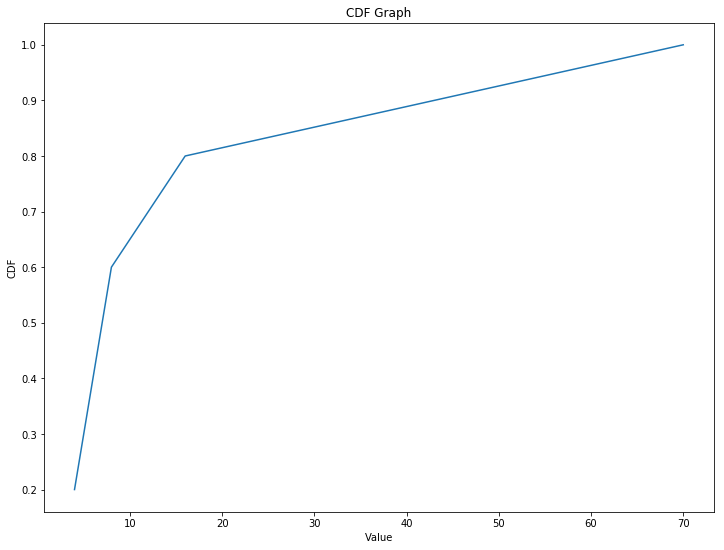

In [32]:
plt.plot(df["Value"],df["CDF"])
plt.xlabel("Value")
plt.ylabel("CDF")
plt.title("CDF Graph")
plt.show()

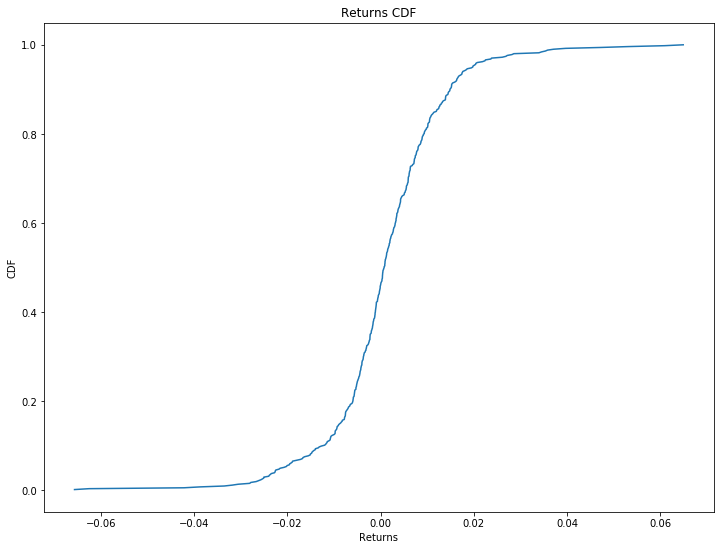

In [33]:
df = pdr.get_data_yahoo("AAPL", start, end)["Adj Close"]
df = df.pct_change().dropna()
#This converts the dataframe to a series, we need to make it back to a pandas dataframe
df = pd.DataFrame(df)
df.columns = ["Returns"]
df["CDF"] = df["Returns"].rank(pct=True)
df.sort_values("Returns",inplace=True)

plt.plot(df["Returns"],df["CDF"])
plt.xlabel("Returns")
plt.ylabel("CDF")
plt.title("Returns CDF")
plt.show()